<a href="https://colab.research.google.com/github/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/blob/master/1_modelo_nao_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#fazer um sistema de recomendacao com filmes pelo generos

1.   pegar os dados
2.   conhecendo os dados
1.   mudar os nomes, columns = ['
2.   extrair os dados passando dados para coulunas binarias, get_dummies
1.   junto os dois dataframe, pd.concat([
2.   gerar um escala/nivel de genero sendo um filmes mais de comedia doque animaçao, StandardScaler
1.   agrupar os filmes usando Cluesteriracao, KMeans
2.   Visualizar o centroids os grupos gerados



o KMeans funciona, passa o numero de cluster, ele joga entao 3 pontos aleatorio chamado de centroids, calcula depois a distancia entre os 3 pontos, pega a metade do camilho e divide os dados dessa metade, recalcula a posição dos centroides os pontos para otimiza a a distancia dos dado realocando o centroides.

assim como redistribuir um hospital por regiao e bairro

- https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- https://filosophy.org/writing/visual-algorithms-k-means-clustering/







In [1]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes_df = pd.read_csv(uri)

filmes_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
filmes_df.columns = ['filme_id', 'titulo', 'generos']
filmes_df.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
type(filmes_df)

pandas.core.frame.DataFrame

In [4]:
type(filmes_df.generos)

pandas.core.series.Series

In [5]:
filmes_df.generos.str

In [6]:
filmes_df.generos

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: generos, Length: 9742, dtype: object

In [7]:
filmes_df.generos.str.get_dummies()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
generos_df = filmes_df.generos.str.get_dummies()
#axis eixo de concatenacao
dados_filmes_df = pd.concat([filmes_df, generos_df], axis=1)
dados_filmes_df.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#para escalar os dados usar a biblioteca de escalamento
from sklearn.preprocessing import StandardScaler

#treina o escalamneto
scaler = StandardScaler()
generos_escalados_ndarray = scaler.fit_transform(generos_df)

generos_escalados_ndarray

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [10]:
generos_escalados_ndarray.shape

(9742, 20)

In [51]:
#escalado Toy Story
print(generos_escalados_ndarray[53])
print(dados_filmes_df.loc[53])

[-0.05917995 -0.48060698  2.59101927 -0.25867916  3.69752441 -0.7921263
 -0.37463158 -0.21748944 -0.90024672  3.3920166  -0.09492563 -0.3340552
 -0.12839708 -0.18841895 -0.24998637 -0.44263346 -0.33443476 -0.49125897
 -0.20201972 -0.13206534]
filme_id                                              60
titulo                Indian in the Cupboard, The (1995)
generos                       Adventure|Children|Fantasy
(no genres listed)                                     0
Action                                                 0
Adventure                                              1
Animation                                              0
Children                                               1
Comedy                                                 0
Crime                                                  0
Documentary                                            0
Drama                                                  0
Fantasy                                                1
Film-Noir       

In [35]:
print(dados_filmes_df['Adventure'].sum())
print(dados_filmes_df['Children'].sum())
print(dados_filmes_df['Fantasy'].sum())

1263
664
779


In [50]:
#filter
print(dados_filmes_df[dados_filmes_df.generos == 'Adventure|Children|Fantasy'])

      filme_id                                             titulo  ... War  Western
1            2                                     Jumanji (1995)  ...   0        0
53          60                 Indian in the Cupboard, The (1995)  ...   0        0
109        126                  NeverEnding Story III, The (1994)  ...   0        0
767       1009                    Escape to Witch Mountain (1975)  ...   0        0
1514      2043          Darby O'Gill and the Little People (1959)  ...   0        0
1556      2093                                Return to Oz (1985)  ...   0        0
1617      2161                      NeverEnding Story, The (1984)  ...   0        0
1618      2162  NeverEnding Story II: The Next Chapter, The (1...  ...   0        0
1799      2399                      Santa Claus: The Movie (1985)  ...   0        0
3574      4896  Harry Potter and the Sorcerer's Stone (a.k.a. ...  ...   0        0
6075     41566  Chronicles of Narnia: The Lion, the Witch and ...  ...   0  

In [12]:
#agrupar os filmes usando Cluesteriracao - KMeans
from sklearn.cluster import KMeans

#criar um modele, passando o numero de grupos n_clusters
modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados_ndarray)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
#imprimir os grupos, pegar os rotulos com labels
print('grupos {}'.format(modelo.labels_))

grupos [2 2 0 ... 0 2 0]


In [14]:
#o f é o format
print(f'grupos {modelo.labels_}')

grupos [2 2 0 ... 0 2 0]


In [15]:
print(generos_df.columns)
#centro de cada grupo
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 3.89029120e-02 -4.06094582e-01 -2.48191571e-01 -2.52364040e-01
  -2.70451223e-01  2.43188560e-01 -1.88723533e-01  1.39693354e-01
   1.42230224e-01 -1.40512614e-01 -7.68421178e-02 -1.44975725e-01
  -1.12234976e-01  2.75586127e-02 -1.87802361e-01  2.13750719e-01
  -2.29800092e-01 -4.67185586e-01  1.18448148e-02  3.04568289e-02]
 [-5.91799474e-02  8.33471290e-01  2.10058439e-01 -2.30351738e-01
  -2.67725966e-01 -5.65645897e-01  4.87742921e-01 -2.15835793e-01
  -9.36154416e-02 -2.34527706e-03  1.86142571e-01  3.81281444e-01
   1.46187526e-01 -1.80869855e-01  4.21405829e-01 -3.41500061e-01
   4.22495067e-01  1.09756439e+00  3.15201783e-02 -3.41770223e-02]
 [-5.91799474e-02 -4.20634946e-02  8.89894828e-01  2.262794

In [16]:
#transformar em dataframe
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos_df.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.038903,-0.406095,-0.248192,-0.252364,-0.270451,0.243189,-0.188724,0.139693,0.142230,-0.140513,-0.076842,-0.144976,-0.112235,0.027559,-0.187802,0.213751,-0.229800,-0.467186,0.011845,0.030457
1,-0.059180,0.833471,0.210058,-0.230352,-0.267726,-0.565646,0.487743,-0.215836,-0.093615,-0.002345,0.186143,0.381281,0.146188,-0.180870,0.421406,-0.341500,0.422495,1.097564,0.031520,-0.034177
2,-0.059180,-0.042063,0.889895,2.262794,2.488792,0.228675,-0.326671,-0.202315,-0.591829,0.874751,-0.094926,-0.271139,0.245818,0.383092,-0.129445,-0.275188,0.126533,-0.472679,-0.169549,-0.083510


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6528fe73c8>,
      dtype=object)

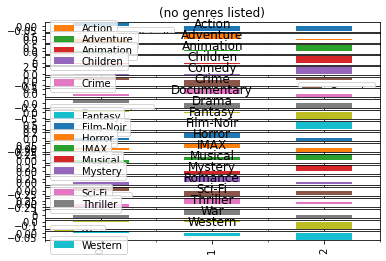

In [17]:
grupos.plot.bar(subplots=True)